# **Principal Component Analysis for Outlier Detection**


El Feature Bagging es una técnica de ensamblado en aprendizaje automático, especialmente útil para la detección de anomalías en conjuntos de datos de alta dimensión y con ruido. A diferencia del bagging tradicional, que se basa en la creación de subconjuntos aleatorios de datos, el Feature Bagging se centra en la selección aleatoria de características (features) para entrenar cada modelo.

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
import sys, os
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
plt.style.use('ggplot')
sns.set_context('notebook')


proj_root = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if proj_root not in sys.path:
    sys.path.insert(0, proj_root)

from PyOD_ADGE.models.principal_component_analysis import PCA

In [25]:
url_data='https://drive.google.com/uc?export=download&id=1jGJ-Bam7dR9vH4Y6-677LNNpW-PulLfL'
data=pd.read_csv(url_data,header=0)
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [26]:
data.shape

(1000000, 8)

In [27]:
data['fraud']=data['fraud'].astype(np.int8)
data['fraud'].value_counts()


fraud
0    912597
1     87403
Name: count, dtype: int64

In [28]:
X_f=data.drop(['fraud'],axis=1)
y_f=data['fraud']
X,_,y,_= train_test_split(X_f,y_f,stratify=y_f,train_size=5000,random_state=42)

In [29]:
y.value_counts()

fraud
0    4563
1     437
Name: count, dtype: int64

In [30]:
X=StandardScaler().fit_transform(X)

In [31]:
X.mean(axis=0)

array([ 2.27373675e-17, -2.84217094e-17,  7.81597009e-18,  5.68434189e-18,
       -6.67910172e-17, -1.56319402e-17, -5.54223334e-17])

In [32]:
X.shape

(5000, 7)

In [33]:
model = PCA( contamination=0.01, n_components=2, random_state=42)
model.fit(X)

In [38]:
model.decision_scores_.shape
model.decision_scores_[0:10]

array([44.22489212, 34.51884423, 28.83252561, 17.49333897, 49.86461282,
       19.07853111, 29.33264862, 17.04380987, 27.63148861, 27.7456041 ])

Threshold for 95%:  52.13923003105487


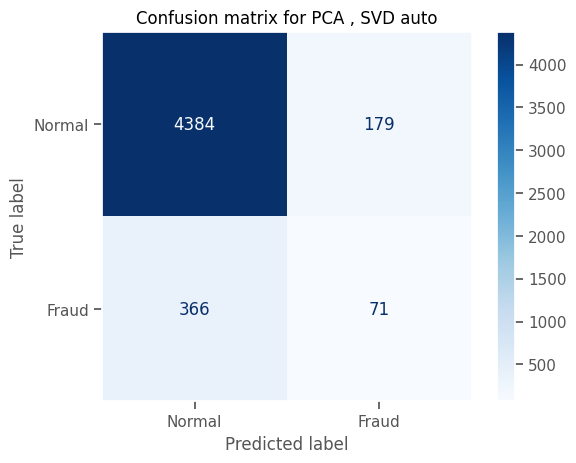

In [39]:
from sklearn.metrics import confusion_matrix

scores = model.decision_function(X)
thresh = np.percentile(model.decision_function(X), 95)
print('Threshold for 95%: ',thresh)
y_predcm = np.where(scores > thresh, 1, 0).astype(int)


cm=confusion_matrix(y,y_predcm)
fig,ax=plt.subplots()
disp=ConfusionMatrixDisplay(cm,display_labels=['Normal','Fraud'])
disp.plot(cmap='Blues',ax=ax,colorbar=True)
ax.set_title('Confusion matrix for PCA , SVD auto')
ax.grid(False)
plt.show()

In [41]:
model2 = PCA( svd_solver="full", n_components=0.90, whiten=True , random_state=42)
model2.fit(X)

TypeError: slice indices must be integers or None or have an __index__ method